# CRO Algorithm examples

## Example I: max_ones problem

[*Running transpose all] Initialization:  max_ones max
Reef initialization: 65.0
Best-fitness: 65.0 
 0.0% completado 

Best-fitness: 84.0 
 33.33333333333333% completado 

Best-fitness: 95.0 
 66.66666666666666% completado 

Best-fitness: 100.0 
 100% completado 



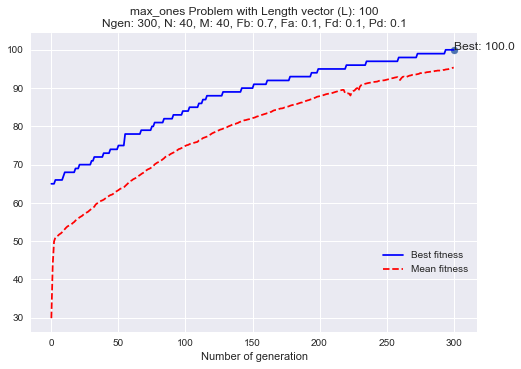

Best coral:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best solution: 100.0
Wall time: 46.9 s


In [1]:
import numpy as np
import seaborn as sns 
from cro import *

## ------------------------------------------------------
## Parameters initialization

Ngen = 300                 # Number of generations
N  = 40                    # MxN: reef size
M  = 40                    # MxN: reef size
Fb = 0.7                   # Broadcast prob.
Fa = 0.1                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.6                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
L = 100
## ------------------------------------------------------

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, opt, L, problem_name='max_ones', verbose=True)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit()

## Example II: feature selection Classification (max auc)

https://www.kaggle.com/primaryobjects/voicegender

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. It contains 20 features and I added 10 noisy!

[*Running transpose all] Initialization:  feature_selection max
Reef initialization: 0.678906934161
Best-fitness: 0.678906934161 
 0.0% completado 

Best-fitness: 0.968493750498 
 100% completado 



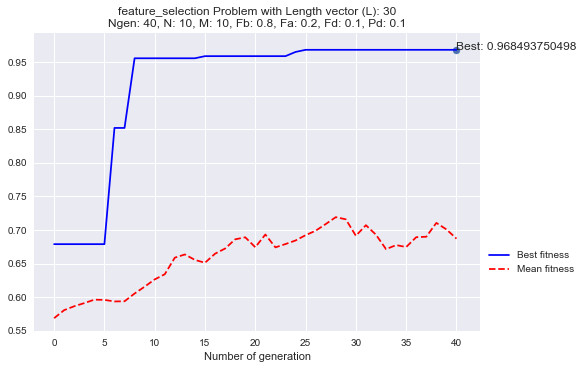

Best coral:  [1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Best solution: 0.968493750498
Wall time: 55.8 s
['meanfreq' 'sd' 'median' 'Q75' 'IQR' 'sp.ent' 'sfm' 'mode' 'meanfun'
 'minfun' 'maxfun']


In [2]:
## ------------------------------------------------------
## Parameters initialization

Ngen = 40                  # Number of generations
N  = 10                    # MxN: reef size
M  = 10                    # MxN: reef size
Fb = 0.8                   # Broadcast prob.
Fa = 0.2                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.6                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'max'                 # flag: 'max' for maximizing and 'min' for minimizing
problem ='feature_selection'
## ------------------------------------------------------

import numpy as np
import seaborn as sns 
from cro import *
from utils import load_data
from sklearn.neighbors import KNeighborsClassifier

dataset = load_data('voice')
L = dataset.data.shape[1] # number of features
X = dataset.data
y = dataset.target

clf = KNeighborsClassifier(2)

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, opt, L, seed=13, problem_name=problem, metric= 'auc', verbose=True)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit(X, y, clf)

names = np.array(dataset.feature_names)
print(names[REEFpob[ind_best, :]>0])

## Example III: feature selection, regression (min mse)

[*Running transpose all] Initialization:  feature_selection min
Reef initialization: 7.89670927362
Best-fitness: 7.06488764671 
 0.0% completado 

Best-fitness: 5.7731720884 
 100% completado 



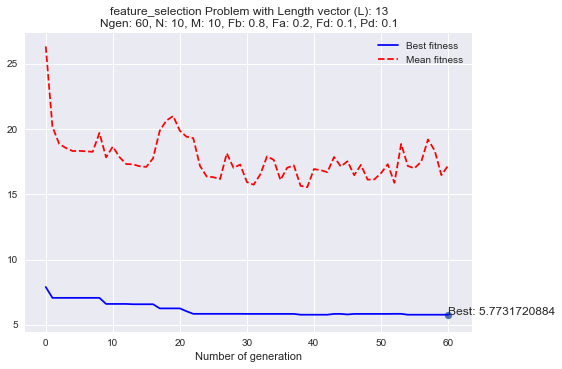

Best coral:  [0 1 1 0 1 1 0 0 0 1 1 1 1]
Best solution: 5.7731720884
Wall time: 3min 49s
['ZN' 'INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'B' 'LSTAT']


In [3]:
import numpy as np
import seaborn as sns 
from sklearn import datasets, ensemble
from sklearn.metrics import r2_score, mean_squared_error   
from cro import *

## ------------------------------------------------------
## Parameters initialization

Ngen = 60                  # Number of generations
N  = 10                    # MxN: reef size
M  = 10                     # MxN: reef size
Fb = 0.8                   # Broadcast prob.
Fa = 0.2                   # Asexual reproduction prob.
Fd = 0.1                   # Fraction of the corals to be eliminated in the depredation operator.
r0 = 0.7                   # Free/total initial proportion
k  = 3                     # Number of opportunities for a new coral to settle in the reef
Pd = 0.1                   # Depredation prob.
opt= 'min'                 # flag: 'max' for maximizing and 'min' for minimizing

problem ='feature_selection'
## ------------------------------------------------------

dataset = datasets.load_boston()
L = dataset.data.shape[1] # number of features
X = dataset.data
y = dataset.target

params = {'n_estimators': 60, 'max_depth': 4, 'min_samples_split': 2}
clf = ensemble.GradientBoostingRegressor(**params)  

cro = CRO(Ngen, N, M, Fb, Fa, Fd, r0, k, Pd, opt, L, problem_name=problem, metric= mean_squared_error, verbose=True)
%time (REEF, REEFpob, REEFfitness, ind_best, Bestfitness, Meanfitness) = cro.fit(X, y, clf)

names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
print(names[REEFpob[ind_best, :]>0])